In [1]:
import sklearn as sk
from sklearn import preprocessing
import pandas as pd
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/diabetes.csv'

Mounted at /content/drive
/content/drive/MyDrive/diabetes.csv


In [3]:
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df = pd.DataFrame(data)
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

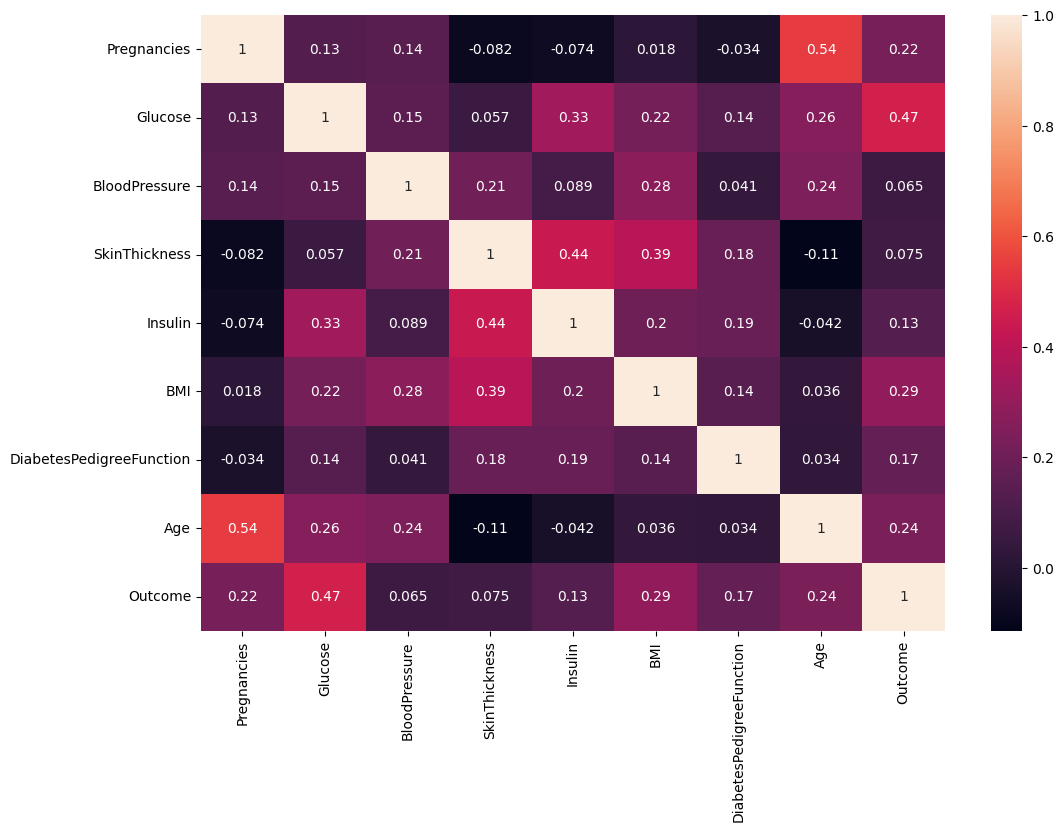

In [8]:
corr = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [9]:
x = df.drop(columns=["Outcome", "BloodPressure", "SkinThickness"])
y = df["Outcome"]

In [10]:
from scipy.stats import norm,chisquare

freqs =pd.Series(y).value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

for target_val in freqs.index:
  z = (freqs[target_val] - expected_frequency)/std_errors[target_val]
  print("Class:",target_val)
  print("p-value:",norm.cdf(-np.abs(z)))
  print("----")


Class: 0
p-value: 8.040104965487386e-19
----
Class: 1
p-value: 8.040104965487097e-19
----


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [13]:
x_train.shape

(691, 6)

In [14]:
y_train.shape

(691,)

## Min Max Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

## standard scaler


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

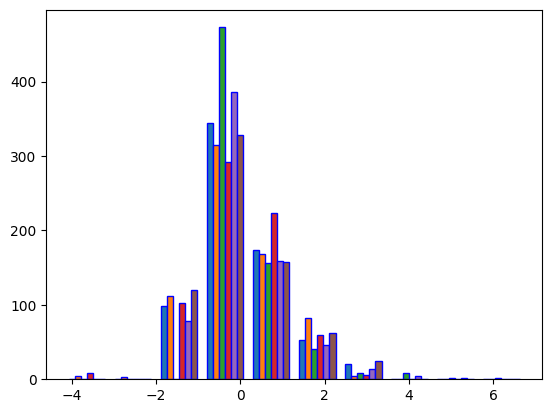

In [17]:
plt.hist(x_train ,ec='blue', bins=10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

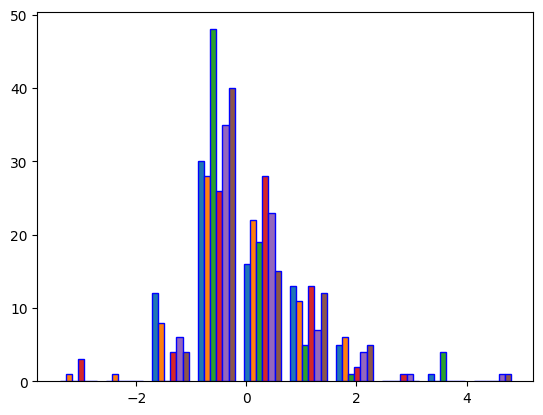

In [18]:
plt.hist(x_test ,ec='blue', bins=10)
plt.show

#Desecion tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, criterion='entropy', max_depth=7, max_features='auto', random_state=0)

In [21]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       random_state=0)

In [22]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for training set')

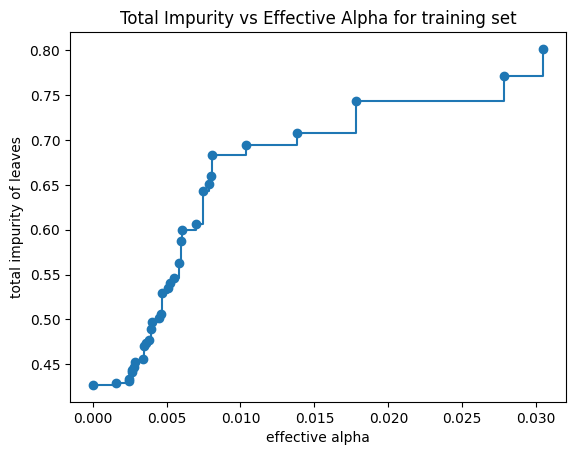

In [23]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

In [24]:
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

In [25]:
optimal_ccp_alpha

0.0

In [26]:
pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
conf_matrix = confusion_matrix(y_test, pred)

In [29]:
conf_matrix

array([[44,  4],
       [14, 15]])

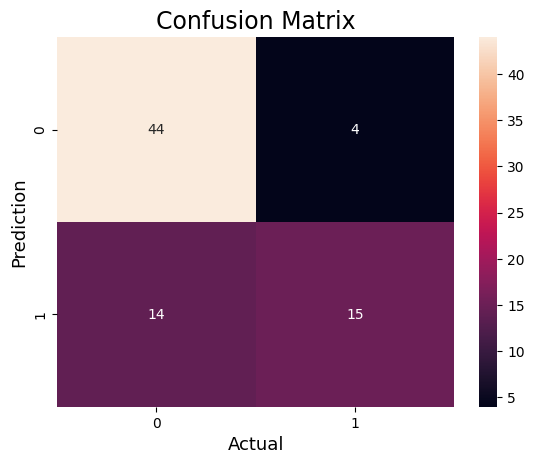

In [30]:
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [31]:
print("accureccy: {:.2f} %".format(accuracy_score(y_test, pred)*100))

accureccy: 76.62 %


## BaggingClassifier


In [32]:
from sklearn.ensemble import BaggingClassifier

In [41]:
estimator_range = [2,4,6,8]

In [35]:
y_pred = pred

In [42]:
models = []
scores = []
for n_estimators in estimator_range:
  Bclf = BaggingClassifier(random_state=0, n_estimators=n_estimators)
  Bclf.fit(x_train, y_train)
  models.append(Bclf)
  scores.append(accuracy_score(y_true= y_test, y_pred = Bclf.predict(x_test)))

In [43]:
print(f"Models Bagging prefer:{models}")
print("--------------------------------")
print(f"Top scores Bagging:{scores}")

Models Bagging prefer:[BaggingClassifier(n_estimators=2, random_state=0), BaggingClassifier(n_estimators=4, random_state=0), BaggingClassifier(n_estimators=6, random_state=0), BaggingClassifier(n_estimators=8, random_state=0)]
--------------------------------
Top scores Bagging:[0.7532467532467533, 0.7792207792207793, 0.7662337662337663, 0.7402597402597403]


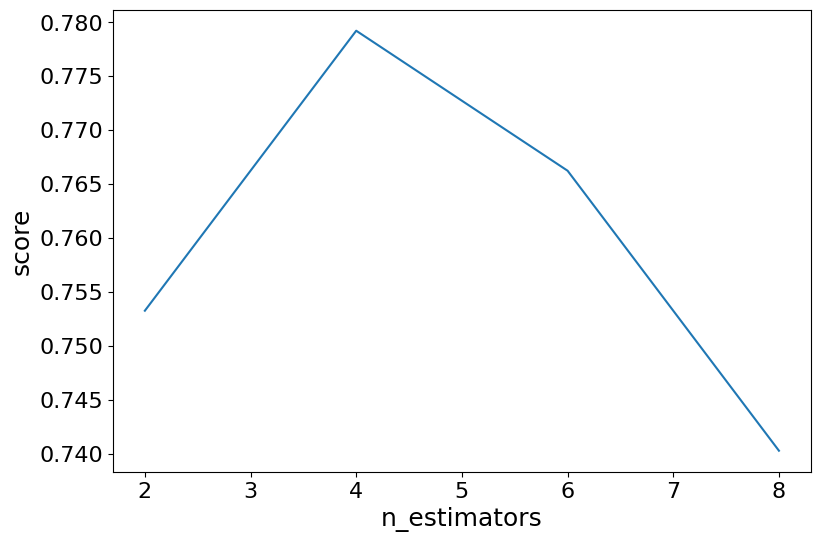

In [44]:
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.show()